In [1]:
import sys
sys.path.append('/Users/nmontes/OneDrive/Documentos/PhD/ngames/ngames')
import matplotlib.pyplot as plt
from extensivegames import ExtensiveFormGame, plot_game
from build import build_full_game

# Default configuration

Both fishers start at the shore. They can go to one of two fishing spots. If fishers go to different spots, they stay there. If they go to the same spot, they can choose to stay or leave. If, even after then, both fishers end up at the same spot, they fight. The probability of any fisher $i$ winning the fight is given by:

\begin{equation}
P(\text{$i$ wins fight})=\frac{S_i}{\sum_j S_j}
\end{equation}

where $S_i$ denotes the strength of fisher $i$, a parameter between 1 (weakest) and 10 (strongest).

In [2]:
my_fig_kwargs = dict(figsize=(20,10), frameon=False)
my_node_kwargs = dict(font_size=10, node_size=500, edgecolors='k',
                      linewidths=1.5)
my_edge_kwargs = dict(arrowsize=15, width=1.5)
my_edge_labels_kwargs = dict(font_size=10)
my_patch_kwargs = dict(linewidth=2)
my_legend_kwargs = dict(fontsize=16, loc='upper right', edgecolor='white')
my_info_sets_kwargs = dict(linestyle='--', linewidth=3)

position_colors =  {'alice':'aquamarine', 'bob':'greenyellow'}

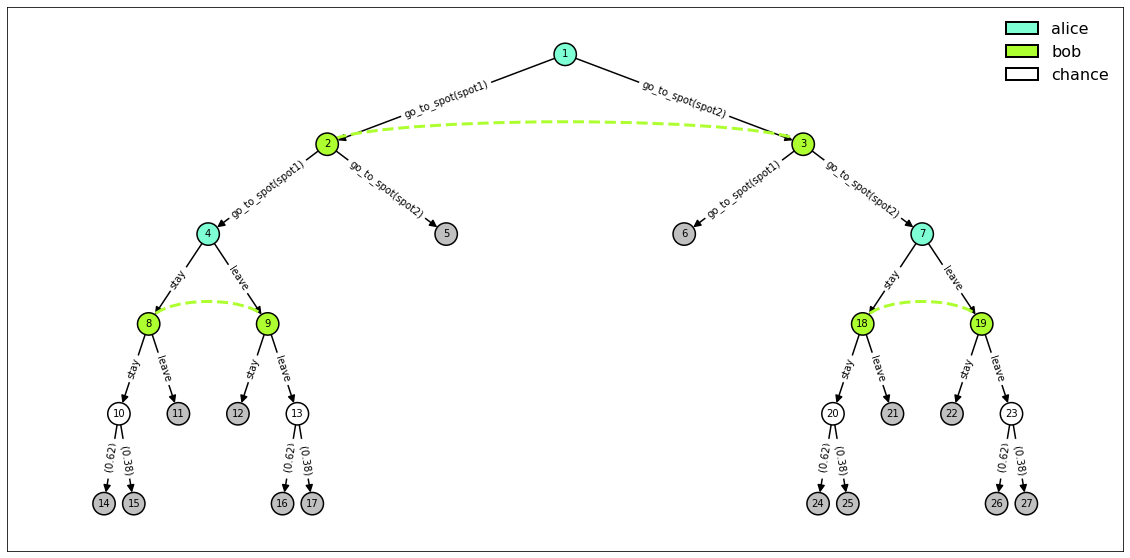

In [3]:
game = build_full_game('.', 'fishers', threshold=0)

fig = plot_game(game,
                position_colors,
                fig_kwargs=my_fig_kwargs,
                node_kwargs=my_node_kwargs,
                edge_kwargs=my_edge_kwargs,
                edge_labels_kwargs=my_edge_labels_kwargs,
                patch_kwargs=my_patch_kwargs,
                legend_kwargs=my_legend_kwargs,
                draw_utility=False,
                info_sets_kwargs=my_info_sets_kwargs)

# fig.savefig('fishers_default.png', bbox_inches='tight', dpi=500)

# *First-in-time, first-in-right* configuration

Now fishers also start from the shore, but if they go to the same fishing spot, the fisher who gets there first is commited to the spot, while the fisher who has lost the race has to leave. The probability that fisher $i$ wins the race if both fishers go to the same spot is:

\begin{equation}
P(\text{$i$ wins race}) = \frac{V_i}{\sum_j V_j}
\end{equation}

where $V_i$ denotes the speed of fisher $i$, a parameter between 1 (slowest) and 10 (fastest).

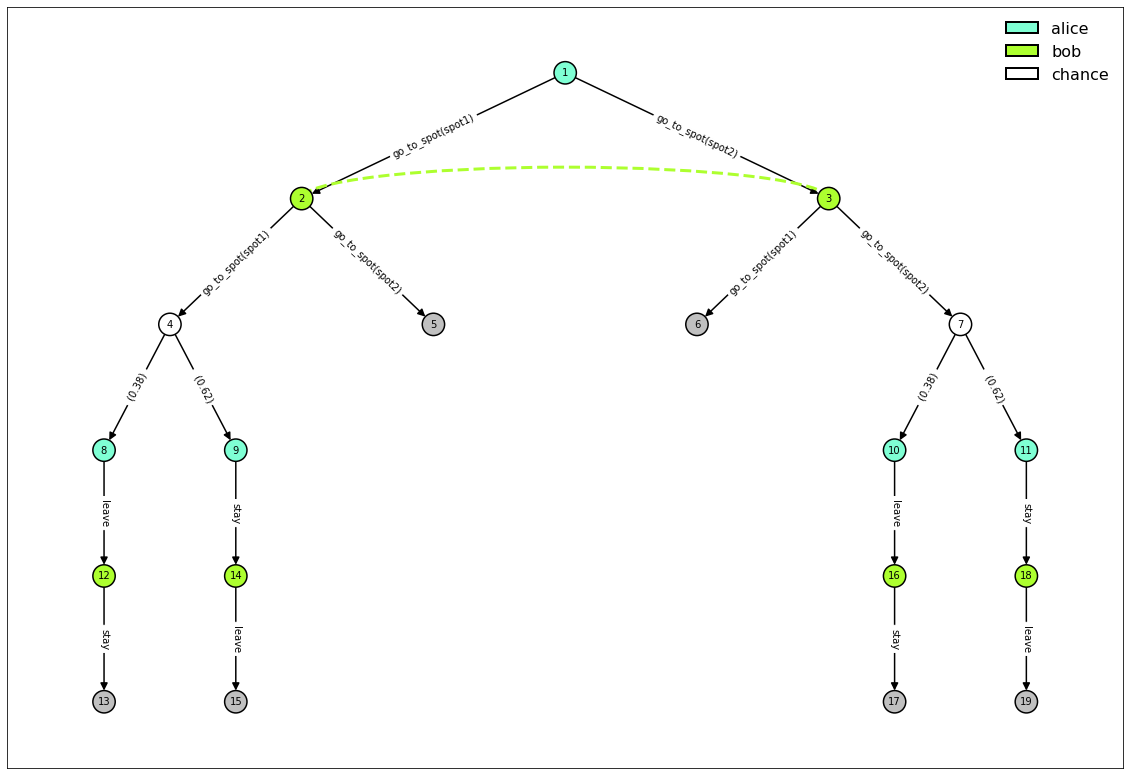

In [7]:
game = build_full_game('.', 'fishers', threshold=1)

fig = plot_game(game,
                position_colors,
                fig_kwargs=my_fig_kwargs,
                node_kwargs=my_node_kwargs,
                edge_kwargs=my_edge_kwargs,
                edge_labels_kwargs=my_edge_labels_kwargs,
                patch_kwargs=my_patch_kwargs,
                legend_kwargs=my_legend_kwargs,
                draw_utility=False,
                info_sets_kwargs=my_info_sets_kwargs)

# fig.savefig('fishers_race.png', bbox_inches='tight', dpi=200)

# *First-to-announce, first-in-right* configuration

In this configuration, one of the fishers is randomly assigned to the position of announcer. When both fishers are in the shore, anyone can go to any spot before the announcer has declared to one spot. Then, both fishers can go to any of the spots. If the fishers both go the spot that the announcer has declared, the announcer is guaranted to win the race to the spot. If the fishers both go to the spot that has not been declared by the announcer, any of them might win the race to get there. The winner of the race is commited to the spot (she stays) while the looser has to leave.

Note that the rules for this configuration are *in addition* to the *first-in-time, first-in-right* rules, and they have been assigned priority 2 (*first-in-time, first-in-right* rules where assigned priority 1, and the default rules were assigned priority 0, as usual).

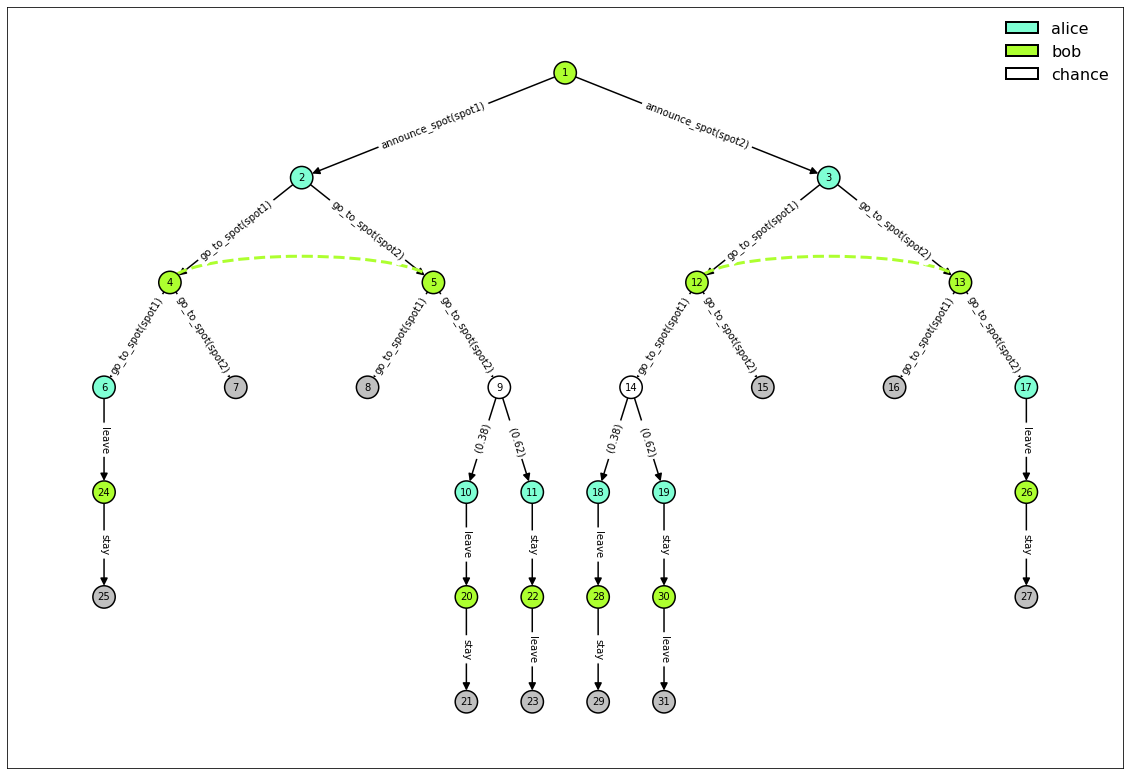

In [9]:
game = build_full_game('.', 'fishers', threshold=2)

my_fig_kwargs = dict(figsize=(20,14), frameon=False)
fig = plot_game(game,
                position_colors,
                fig_kwargs=my_fig_kwargs,
                node_kwargs=my_node_kwargs,
                edge_kwargs=my_edge_kwargs,
                edge_labels_kwargs=my_edge_labels_kwargs,
                patch_kwargs=my_patch_kwargs,
                legend_kwargs=my_legend_kwargs,
                draw_utility=False,
                info_sets_kwargs=my_info_sets_kwargs)

# fig.savefig('fishers_announce.png', bbox_inches='tight', dpi=200)

In [11]:
game.node_rounds

{1: 0,
 2: 1,
 3: 1,
 8: 2,
 10: 2,
 11: 2,
 6: 2,
 7: 2,
 16: 2,
 17: 2,
 18: 2,
 19: 2,
 15: 2,
 21: 3,
 23: 3,
 25: 3,
 27: 3,
 29: 3,
 31: 3}

In [12]:
game.__dict__

{'players': ['alice', 'bob'],
 'game_tree': <networkx.classes.digraph.DiGraph at 0x7fd80dd8dfd0>,
 'turn_function': {1: 'bob',
  2: 'alice',
  4: 'bob',
  5: 'bob',
  9: 'chance',
  3: 'alice',
  12: 'bob',
  13: 'bob',
  14: 'chance',
  10: 'alice',
  20: 'bob',
  11: 'alice',
  22: 'bob',
  6: 'alice',
  24: 'bob',
  17: 'alice',
  26: 'bob',
  18: 'alice',
  28: 'bob',
  19: 'alice',
  30: 'bob'},
 'information_partition': {'alice': [{2},
   {3},
   {10},
   {11},
   {6},
   {17},
   {18},
   {19}],
  'bob': [{1}, {4, 5}, {12, 13}, {20}, {22}, {24}, {26}, {28}, {30}]},
 'is_perfect_information': False,
 'probability': {9: {(9, 10): 0.38461538461538464,
   (9, 11): 0.6153846153846154},
  14: {(14, 18): 0.38461538461538464, (14, 19): 0.6153846153846154}},
 'utility': {},
 'ID': 'fishers',
 'roles': {'alice': ['fisher'], 'bob': ['fisher', 'announcer']},
 'node_info': {1: ['at(alice, shore)', 'at(bob, shore)'],
  2: ['announced(bob, spot1)', 'at(alice, shore)', 'at(bob, shore)'],
  3: [

In [19]:
from equilibrium import get_last_subgames

get_last_subgames(game)

[8, 10, 11, 6, 7, 16, 17, 18, 19, 15]


In [16]:
game.game_tree.terminal_nodes

[7, 8, 15, 16, 21, 23, 25, 27, 29, 31]